In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Load data and remove irrelevant variables

In [2]:
data = pd.read_csv("../02_data_preparation/yoghurt_w_dummy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21251 entries, 0 to 21250
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 21251 non-null  int64  
 1   first_purchase             21251 non-null  bool   
 2   shelf_price                21251 non-null  float64
 3   pct_disc                   21251 non-null  float64
 4   pct_retail_disc            21251 non-null  float64
 5   pct_coupon_disc            21251 non-null  float64
 6   display_1                  21251 non-null  int64  
 7   display_2                  21251 non-null  int64  
 8   display_3                  21251 non-null  int64  
 9   display_4                  21251 non-null  int64  
 10  display_5                  21251 non-null  int64  
 11  display_6                  21251 non-null  int64  
 12  display_7                  21251 non-null  int64  
 13  display_9                  21251 non-null  int

In [3]:
data.drop(labels=["Unnamed: 0", "display_1", "display_5", "display_A", "campaign_6.0", "campaign_30.0", "description_TypeC"],
          axis = 1, inplace = True)

In [4]:
pd.set_option("display.max_columns", None)
data.describe(include = "all")

,first_purchase,shelf_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_2,display_3,display_4,display_6,display_7,display_9,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,marital_status_A,marital_status_B,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_19-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,income_100-124K,income_125-149K,income_15-24K,income_150-174K,income_175-199K,income_200-249K,income_25-34K,income_250K+,income_35-49K,income_50-74K,income_75-99K,income_Under 15K,hhsize_1,hhsize_2,hhsize_3,hhsize_4,hhsize_5+,campaign_8.0,campaign_13.0,campaign_18.0,campaign_29.0,description_TypeA,description_TypeB
count,21251,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.00000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.156933,0.158316,0.153330,0.004987,0.011152,0.007623,0.001082,0.005459,0.012046,0.004047,0.148699,0.001223,0.048751,0.008235,0.005270,0.488918,0.125406,0.686321,0.015152,0.005176,0.037834,0.061974,0.295092,0.314009,0.147711,0.122677,0.159240,0.098537,0.102254,0.63997,0.042727,0.211896,0.276975,0.347701,0.067009,0.053692,0.080420,0.074820,0.054586,0.085972,0.017646,0.006870,0.079384,0.017646,0.180086,0.224037,0.126394,0.052139,0.280975,0.374476,0.156746,0.089596,0.098207,0.076373,0.077879,0.075855,0.006776,0.230248,0.006776
std,NaN,1.104681,0.145841,0.137543,0.044610,0.105017,0.086979,0.032881,0.073682,0.109096,0.063488,0.355800,0.034958,0.215351,0.090374,0.072407,0.499889,0.331186,0.463999,0.122161,0.071761,0.190798,0.241113,0.456095,0.464131,0.354821,0.328073,0.365908,0.298046,0.302989,0.48002,0.202247,0.408661,0.447515,0.476252,0.250043,0.225413,0.271948,0.263107,0.227175,0.280330,0.131665,0.082604,0.270344,0.131665,0.384268,0.416956,0.332301,0.222312,0.449486,0.483999,0.363569,0.285609,0.297602,0.265600,0.267987,0.264773,0.082040,0.421001,0.082040
min,NaN,0.350000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.400000,0.

##Dummy model as benchmark

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [6]:
X = data.drop("first_purchase", axis = 1)
y = data["first_purchase"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

#Define and fit two strategies for dummy model

In [8]:
dummy_frequent = DummyClassifier(strategy = "most_frequent")
dummy_stratified = DummyClassifier(strategy = "stratified")

In [9]:
dummy_frequent.fit(X_train, y_train)
dummy_stratified.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

#Calculate metrics for both dummy models

In [10]:
y_pred_frq = dummy_frequent.predict(X_test)
y_pred_str = dummy_stratified.predict(X_test)

In [11]:
#metrics for dummy classifier / most frequent strategy
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_frq))

0.0
0.0
0.0
0.662667607621736


C:\Users\Gabriele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
#metrics for dummy classifier / stratified strategy
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_str))

0.35541963982330954
0.3465871438038436
0.3647140864714086
0.5537520583392143


In [13]:
cv = StratifiedShuffleSplit(n_splits = 5) 

###Simple Classifier

In [46]:
clf = DecisionTreeClassifier()

#cross_val metrics for simple classifier
scores = ["f1", "precision", "recall", "accuracy"]

for score in scores:
    list_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = score )
    print(list_scores.mean())

0.5976142602677301
0.6948690828837039
0.5389179755671901
0.7662352941176471


In [47]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [50]:
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [51]:
#metrics for simple model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_clf))

0.6125634022629731
0.6953055801594331
0.5474198047419805
0.766407904022583


In [52]:
y_pred_clf_train = clf.predict(X_train)
#metrics for simple model- TRAIN
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_train, y_pred_clf_train))

0.764758408572279
0.8869965477560414
0.6721311475409836
0.8605294117647059


#Hyperparameter tuning

In [15]:
import scipy

In [16]:
rand_params = {'max_depth': scipy.stats.randint(2,50), "min_samples_leaf": scipy.stats.randint(10,1000), 
               "min_samples_split": scipy.stats.randint(20,2000)}

In [17]:
rand_search = RandomizedSearchCV(clf, rand_params, n_iter=30, scoring = "f1", cv = cv)

In [18]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
                   estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002F008F25F40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002F008779AF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002F008F41C10>},
                   scoring='f1')

In [19]:
rand_search.best_score_

0.30804253663437403

In [20]:
rand_search.best_estimator_

DecisionTreeClassifier(max_depth=42, min_samples_leaf=226,
                       min_samples_split=826)

In [21]:
grid_params = {"max_depth":[10, 20, 30, 40, 50], "min_samples_leaf":[10, 20, 50, 100, 200, 300, 400, 500, 600, 800], 
               "min_samples_split":[25, 50, 100, 150, 200, 300, 400, 500]}

In [22]:
grid = GridSearchCV(clf, param_grid = grid_params, scoring = "f1", cv = cv)

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [10, 20, 50, 100, 200, 300, 400,
                                              500, 600, 800],
                         'min_samples_split': [25, 50, 100, 150, 200, 300, 400,
                                               500]},
             scoring='f1')

In [24]:
grid.best_score_

0.555725691469459

In [25]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=25)

#Validation

In [8]:
from plotting import plot_learning_curve, plot_validation_curve

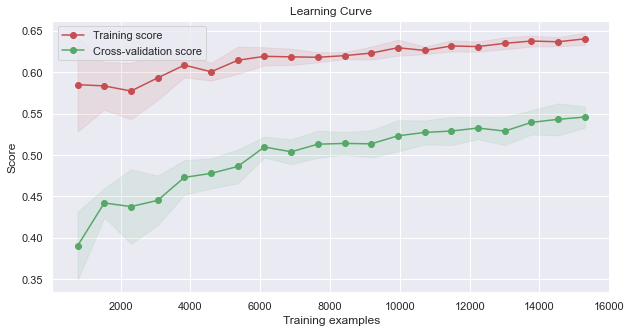

In [27]:
learning_curve = plot_learning_curve(grid.best_estimator_, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(.05, 1, 20), scoring = "f1")           

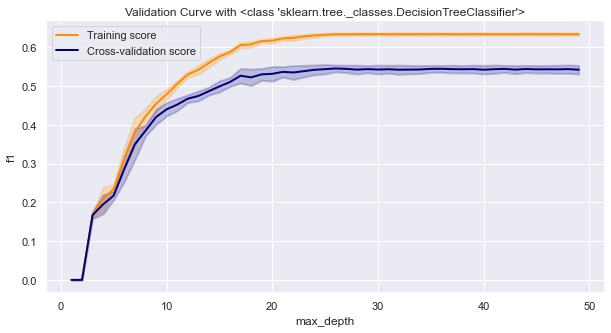

In [28]:
val_max_depth = plot_validation_curve(grid.best_estimator_, X_train, y_train, cv = cv, 
                                      param_name ="max_depth", param_range = np.arange(1,50,1), scoring = "f1")

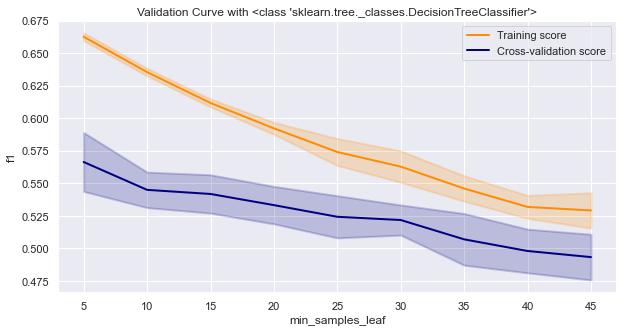

In [29]:
val_min_samples_leaf = plot_validation_curve(grid.best_estimator_, X_train, y_train, cv=cv,
                                             param_name="min_samples_leaf", param_range = np.arange(0, 50, 5), scoring = "f1")

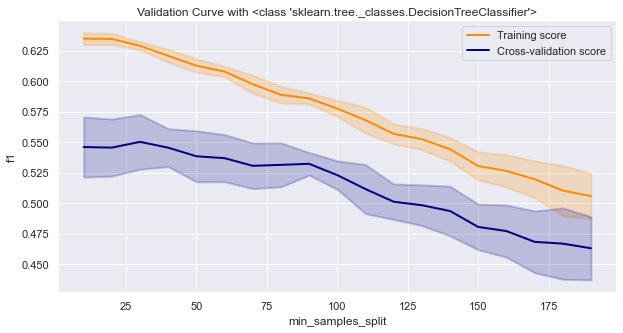

In [30]:
val_min_samples_split = plot_validation_curve(grid.best_estimator_, X_train, y_train, cv=cv,
                                              param_name = "min_samples_split", param_range = np.arange(0,200,10), scoring="f1")

#Best model

In [53]:
fav_model = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 5, min_samples_split = 30)
fav_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=26, min_samples_leaf=5, min_samples_split=30)

In [54]:
#crossval metrics for fav model
scores = ["f1", "precision", "recall", "accuracy"]

for score in scores:
    list_scores = cross_val_score(fav_model, X_train, y_train, cv=cv, scoring = score )
    print(list_scores.mean())

0.5867017008209513
0.6476703900018498
0.5033158813263526
0.7411764705882353


In [55]:
y_pred_fav = fav_model.predict(X_test)

In [56]:
#metrics for fav model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_fav))

0.5734958111195735
0.6317114093959731
0.5251046025104602
0.7365325805692778


In [57]:
y_pred_fav_train = fav_model.predict(X_train)
#metrics for fav model- TRAIN
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_train, y_pred_fav_train))

0.6664760815704212
0.7346638655462185
0.6098709452389257
0.7941176470588235


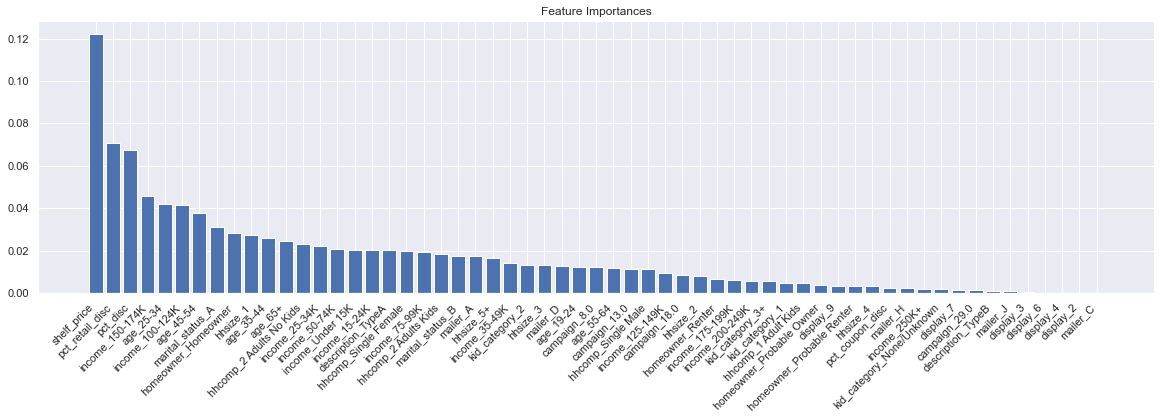

In [58]:
importances = fav_model.feature_importances_

indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [X.columns [i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [62]:
#crossval metrics for rf model - TRAIN
scores = ["f1", "precision", "recall", "accuracy"]

for score in scores:
    list_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring = score )
    print(list_scores.mean())

0.62602738235444
0.6913047591283737
0.5706806282722513
0.7634117647058825


In [63]:
#metrics for rf model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_rf))

0.6372145263946088
0.6879547291835085
0.5934449093444909
0.7720536344389556


In [64]:
y_pred_rf_train = rf.predict(X_train)
#metrics for rf model- TRAIN
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_train, y_pred_rf_train))

0.7735218263444456
0.8551214361140443
0.7061388210673177
0.8605294117647059


In [17]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#Hyperparameter tuning for Random Forest Classifier

In [68]:
rand_params_rf = {"n_estimators": scipy.stats.randint(50, 250), 'max_depth': scipy.stats.randint(5,50), "min_samples_leaf": scipy.stats.randint(5,100), 
               "min_samples_split": scipy.stats.randint(10,300)}
#removed due to processor limitation , "max_features": ['sqrt', 'log2', None]

In [69]:
rand_rf = RandomizedSearchCV(rf, rand_params_rf, n_iter=30, scoring = "f1", cv = cv)

In [70]:
rand_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
                   estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002F013A1B0A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002F00D03FC10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002F013A1B790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002F013A10F40>},
                   scoring='f1')

In [71]:
rand_rf.best_score_

0.435262296031638

In [72]:
rand_rf.best_estimator_

RandomForestClassifier(max_depth=36, min_samples_leaf=9, min_samples_split=18,
                       n_estimators=68)

In [73]:
grid_params_rf = {"n_estimators": [100, 150, 200, 250], 'max_depth': [5, 10, 20, 30, 40], "min_samples_leaf": [5, 10, 15], 
               "min_samples_split": [10, 15, 20, 30]}
#removed due to processor limitation , "max_features": ['sqrt', 'log2', None]

In [76]:
grid_rf = GridSearchCV(rf, param_grid = grid_params_rf, scoring = "f1", cv = cv)

In [77]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30, 40],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 15, 20, 30],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='f1')

In [78]:
grid_rf.best_score_

0.4979305096562691

In [79]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=250)

Validation

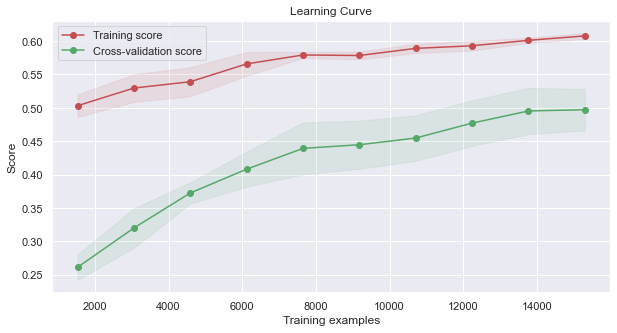

In [82]:
learning_curve = plot_learning_curve(grid_rf.best_estimator_, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(0.1, 1, 10), scoring = "f1")           

In [ ]:
### not continued, tuned model performs worse than initial random forest 

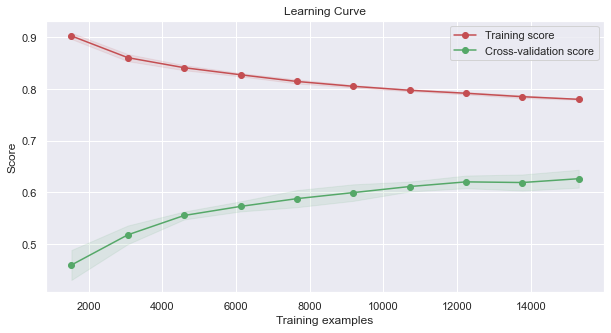

In [18]:
## try validation with initial random forest model
learning_curve = plot_learning_curve(rf, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(0.1, 1, 10), scoring = "f1")      

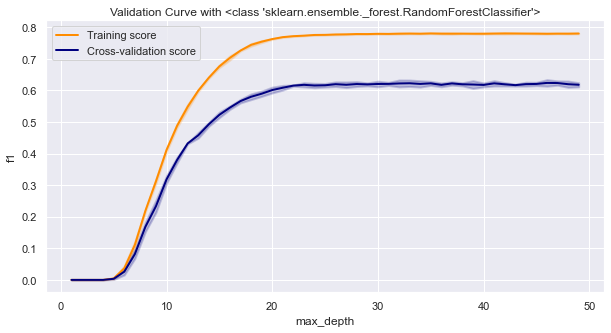

In [20]:
val_max_depth = plot_validation_curve(rf, X_train, y_train, cv = cv, 
                                      param_name ="max_depth", param_range = np.arange(1,50,1), scoring = "f1")

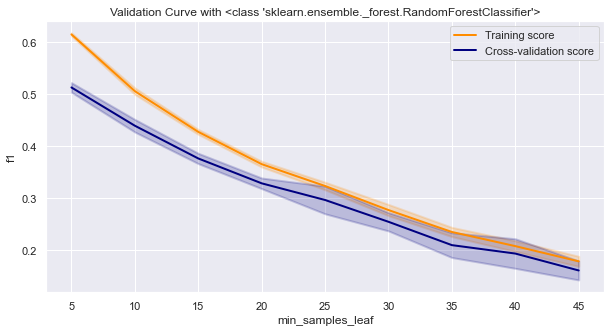

In [21]:
val_min_samples_leaf = plot_validation_curve(rf, X_train, y_train, cv=cv,
                                             param_name="min_samples_leaf", param_range = np.arange(100, 250, 5), scoring = "f1")

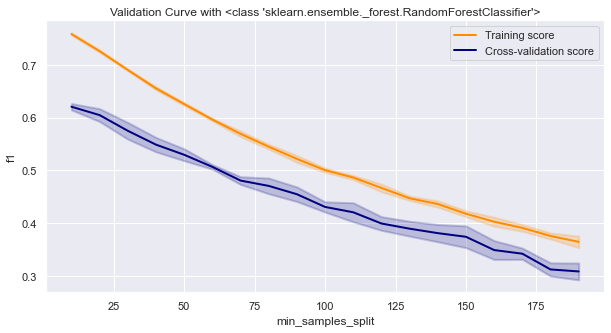

In [22]:
val_min_samples_split = plot_validation_curve(rf, X_train, y_train, cv=cv,
                                              param_name = "min_samples_split", param_range = np.arange(0,200,10), scoring="f1")

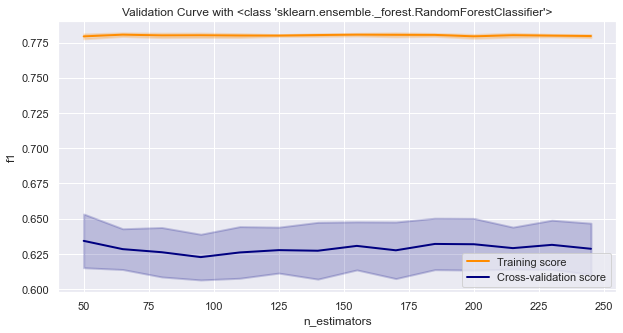

In [24]:
val_n_estimator = plot_validation_curve(rf, X_train, y_train, cv=cv,
                                              param_name = "n_estimators", param_range = np.arange(50,250,15), scoring="f1")

In [ ]:
Best Random Forest model

In [40]:
fav_rf = RandomForestClassifier(max_depth = 25, min_samples_leaf = 5, min_samples_split = 10, n_estimators = 200)
fav_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200)

In [41]:
y_pred_fav_rf_train = fav_rf.predict(X_train)
#metrics for fav model- TRAIN
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_train, y_pred_fav_rf_train))

0.6317567567567568
0.8004280363830926
0.5217997907220091
0.7948235294117647


In [42]:
y_pred_fav_rf = fav_rf.predict(X_test)

In [43]:
#metrics for fav model- TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_fav_rf))

0.539401601348504
0.6815761448349308
0.44630404463040446
0.742884027287697


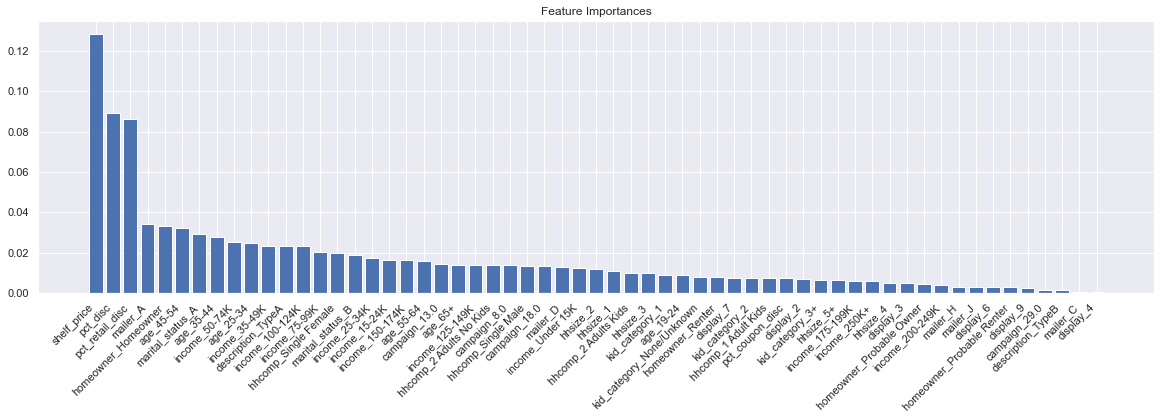

In [44]:
importances_fav_rf = rf.feature_importances_

indices = np.argsort(importances_fav_rf)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [X.columns [i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances_fav_rf[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');

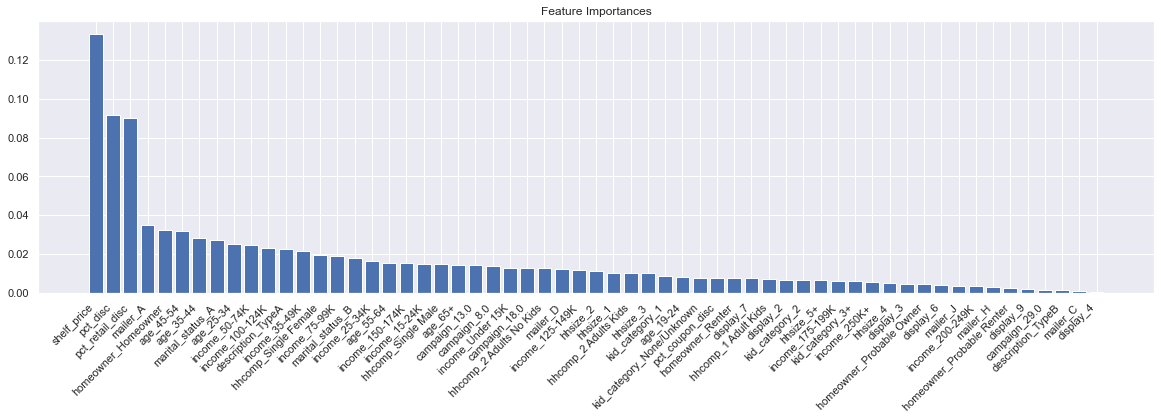

In [84]:
importances_rf = rf.feature_importances_

indices = np.argsort(importances_rf)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [X.columns [i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances_rf[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');
